# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


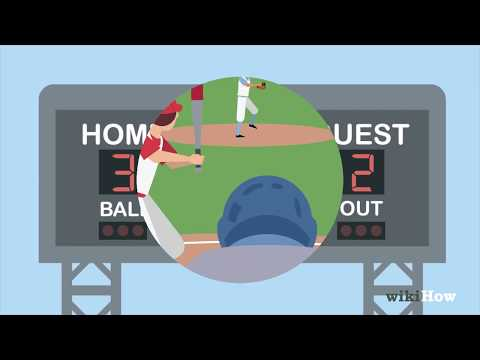

In [138]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [139]:
# people and pitching data
data_folder = 'data/baseballdatabank-2023/core/'
df_people = pd.read_csv(data_folder + 'People.csv')
df_pitching = pd.read_csv(data_folder + 'Pitching.csv')

# salary data
data_folder = 'data/baseballdatabank-2023/contrib/'
df_salaries = pd.read_csv(data_folder + 'Salaries.csv')

In [140]:
# keep salaries from before 2010
mask = df_salaries['yearID'] <= 2010
df_salaries_filt = df_salaries[mask]
df_salaries_filt_copy = df_salaries_filt.copy()

# keep pitching from before 2010
mask = df_pitching['yearID'] <= 2010
df_pitching_filt = df_pitching[mask]
df_pitching_filt_copy = df_pitching_filt.copy()

In [141]:
# dropping duplicate salaries for players in a given year
df_salaries_no_duplicates = df_salaries_filt.drop_duplicates(subset=['playerID', 'yearID'], keep='first').copy()

In [142]:
# computing the size of the dataframes
size_df_people = df_people.shape
size_df_pitching_filt = df_pitching_filt.shape
size_df_salaries_no_duplicates = df_salaries_no_duplicates.shape

print(size_df_people, "|", size_df_pitching_filt)

(20676, 24) | (40433, 30)


**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [143]:
df_people_filt = df_people[df_people['throws'].isin(['L', 'R'])].copy()

**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [144]:
# merge both dataframes (we keep the keys from the pitching df)
pitching_ft_people = pd.merge(df_people_filt, df_pitching_filt, on='playerID', how='right')
display(pitching_ft_people)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1841.0,NaN,NaN,USA,NY,Albany,1888.0,12.0,29.0,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1845.0,1.0,31.0,USA,NY,Brooklyn,1894.0,5.0,3.0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1844.0,11.0,NaN,USA,PA,Philadelphia,1912.0,9.0,26.0,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,1981.0,6.0,1.0,Venezuela,Carabobo,Puerto Cabello,NaN,NaN,NaN,...,0.0,7,6.0,1,571.0,2,55,9.0,3.0,14.0
40429,zieglbr01,1979.0,10.0,10.0,USA,KS,Pratt,NaN,NaN,NaN,...,9.0,0,3.0,1,257.0,12,24,1.0,1.0,8.0
40430,zimmejo02,1986.0,5.0,23.0,USA,WI,Auburndale,NaN,NaN,NaN,...,1.0,0,2.0,0,135.0,0,20,1.0,1.0,1.0
40431,zitoba01,1978.0,5.0,13.0,USA,NV,Las Vegas,NaN,NaN,NaN,...,7.0,7,7.0,0,848.0,1,97,13.0,7.0,17.0


**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

In 1892, the percentage of missing data is about 4.545%.


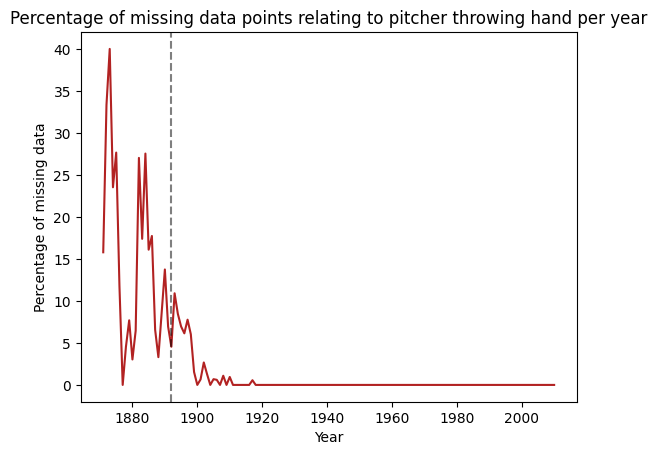

In [145]:
# count the number of NaN values per year in the merged dataframe
nan_by_year = 100 * pitching_ft_people.groupby("yearID")["throws"].apply(lambda x: x.isna().sum()/x.shape[0])

# plot the data
nan_by_year.plot(color='firebrick')

plt.title('Percentage of missing data points relating to pitcher throwing hand per year')
plt.xlabel('Year')
plt.ylabel('Percentage of missing data')

plt.axvline(x=1892, color='black', alpha=0.5, linestyle="--")

plt.plot()

print('In 1892, the percentage of missing data is about ' + str(nan_by_year[1892].round(3)) + '%.')

**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [146]:
# keep data from after 1920
mask = pitching_ft_people['yearID'] >= 1920
pitching_ft_people = pitching_ft_people[mask]
pitching_ft_people_copy = pitching_ft_people.copy()

mask = df_salaries_no_duplicates['yearID'] >= 1920
df_salaries_no_duplicates = df_salaries_no_duplicates[mask]
df_salaries_no_duplicates_copy = df_salaries_no_duplicates.copy()

**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [147]:
# we keep the keys from the pitching-people merged df
pitching_ft_people_ft_salaries = pd.merge(pitching_ft_people, df_salaries_no_duplicates, on=['playerID', 'yearID'], how='left')
display(pitching_ft_people_ft_salaries)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,BK,BFP,GF,R,SH,SF,GIDP,teamID_y,lgID_y,salary
0,acostjo01,1891.0,3.0,4.0,Cuba,La Habana,La Habana,1977.0,11.0,16.0,...,0,349.0,10,40,NaN,NaN,NaN,NaN,NaN,NaN
1,adamsba01,1882.0,5.0,18.0,USA,IN,Tipton,1968.0,7.0,27.0,...,0,1035.0,2,83,NaN,NaN,NaN,NaN,NaN,NaN
2,alexape01,1887.0,2.0,26.0,USA,NE,Elba,1950.0,11.0,4.0,...,0,1447.0,6,96,NaN,NaN,NaN,NaN,NaN,NaN
3,altener01,1894.0,12.0,1.0,USA,OH,Avon,1981.0,9.0,9.0,...,0,112.0,7,27,NaN,NaN,NaN,NaN,NaN,NaN
4,ayersdo01,1891.0,5.0,21.0,USA,VA,Snake Creek,1968.0,5.0,26.0,...,1,861.0,16,115,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,1981.0,6.0,1.0,Venezuela,Carabobo,Puerto Cabello,NaN,NaN,NaN,...,1,571.0,2,55,9.0,3.0,14.0,CHN,NL,18875000.0
33877,zieglbr01,1979.0,10.0,10.0,USA,KS,Pratt,NaN,NaN,NaN,...,1,257.0,12,24,1.0,1.0,8.0,OAK,AL,410000.0
33878,zimmejo02,1986.0,5.0,23.0,USA,WI,Auburndale,NaN,NaN,NaN,...,0,135.0,0,20,1.0,1.0,1.0,NaN,NaN,NaN
33879,zitoba01,1978.0,5.0,13.0,USA,NV,Las Vegas,NaN,NaN,NaN,...,0,848.0,1,97,13.0,7.0,17.0,SFN,NL,18500000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


In 2002, the percentage of missing data is about 36.267%.


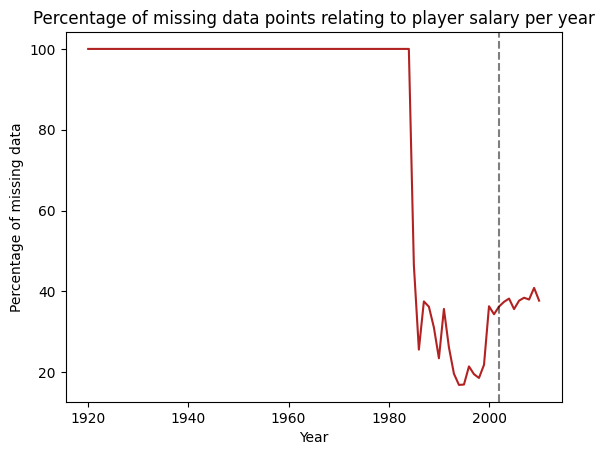

In [148]:
# count the number of NaN values per year in the merged dataframe
nan_by_year = 100 * pitching_ft_people_ft_salaries.groupby("yearID")["salary"].apply(lambda x: x.isna().sum()/x.shape[0])

# plot the data
nan_by_year.plot(color='firebrick')

plt.title('Percentage of missing data points relating to player salary per year')
plt.xlabel('Year')
plt.ylabel('Percentage of missing data')

plt.axvline(x=2002, color='black', alpha=0.5, linestyle="--")

plt.plot()

print('In 2002, the percentage of missing data is about ' + str(nan_by_year[2002].round(3)) + '%.')

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [149]:
# find the first index in the series where there is not 100% missing data and the last index of the series
first_year_of_data = (nan_by_year != 100.).idxmax()
last_year_of_data  = nan_by_year.index[-1]

print('The first year where there is data is ' + str(first_year_of_data) + ' and the last year is ' + str(last_year_of_data) + '.')

The first year where there is data is 1985 and the last year is 2010.


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [150]:
# PROVIDED CODE

df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

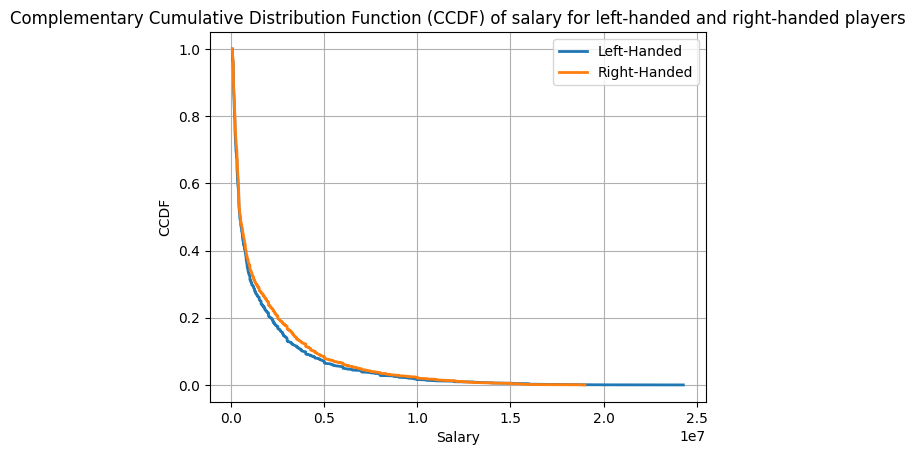

In [151]:
# Drop rows with NaN for salary values
df_filt = df.dropna(subset=['salary'])
df_filt_copy = df_filt.copy()

# Filter for left-hand and right-hand players
left_handed = df_filt[df_filt['throws'] == 'L']
right_handed = df_filt[df_filt['throws'] == 'R']

# Create an array of salary values for each group
left_handed_salaries = left_handed['salary'].values
right_handed_salaries = right_handed['salary'].values

# Sort the arrays for calculation
left_handed_salaries.sort()
right_handed_salaries.sort()

# Calculate CCDF
left_handed_ccdf = 1 - np.arange(1, len(left_handed_salaries) + 1) / len(left_handed_salaries)
right_handed_ccdf = 1 - np.arange(1, len(right_handed_salaries) + 1) / len(right_handed_salaries)

# Plot
plt.plot(left_handed_salaries, left_handed_ccdf, label='Left-Handed', linewidth=2)
plt.plot(right_handed_salaries, right_handed_ccdf, label='Right-Handed', linewidth=2)
plt.xlabel('Salary')
plt.ylabel('CCDF')
#plt.xscale('log')
#plt.yscale('log')
plt.title('Complementary Cumulative Distribution Function (CCDF) of salary for left-handed and right-handed players')
plt.legend()
plt.grid()
plt.show()

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

The issue with the graph here is that, because there are many data points of high salaries (heavy-tailed data), the data for low salaries has been squished and one cannot easily differentiate between values near 0. For instance, there is a large drop between 1.0 and 0.8 on the y-axis, whilst the x-axis values barely change, making it hard to figure out how the salary has increased.

A solution would be to plot the same CCDF for right- and left-handed players, but by introducing a logarithmic scale to the x-axis. This way, low salary values will be more spread out and one will be able to see the data more clearly.

**2.3 —** Implement the solution proposed by yourself in the previous question.

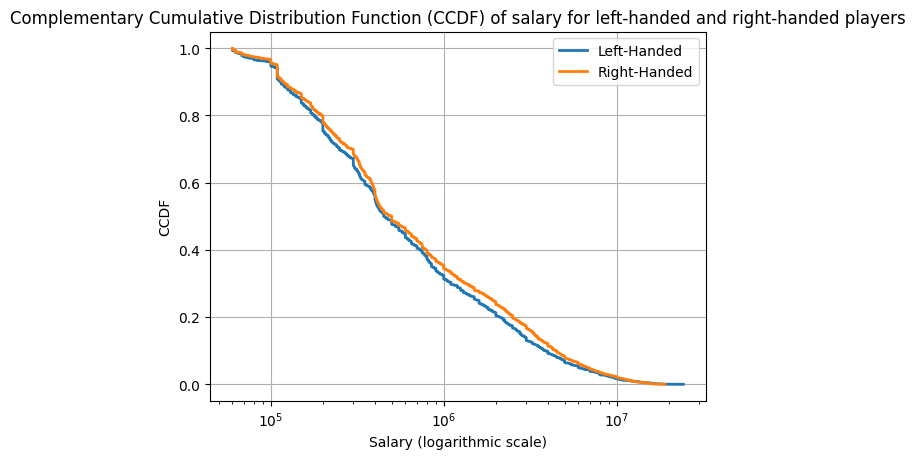

In [152]:
# Drop rows with NaN for salary values
df_filt = df.dropna(subset=['salary'])
df_filt_copy = df_filt.copy()

# Filter for left-hand and right-hand players
left_handed = df_filt[df_filt['throws'] == 'L']
right_handed = df_filt[df_filt['throws'] == 'R']

# Create an array of salary values for each group
left_handed_salaries = left_handed['salary'].values
right_handed_salaries = right_handed['salary'].values

# Sort the arrays for calculation
left_handed_salaries.sort()
right_handed_salaries.sort()

# Calculate CCDF
left_handed_ccdf = 1 - np.arange(1, len(left_handed_salaries) + 1) / len(left_handed_salaries)
right_handed_ccdf = 1 - np.arange(1, len(right_handed_salaries) + 1) / len(right_handed_salaries)

# Plot
plt.plot(left_handed_salaries, left_handed_ccdf, label='Left-Handed', linewidth=2)
plt.plot(right_handed_salaries, right_handed_ccdf, label='Right-Handed', linewidth=2)
plt.xlabel('Salary (logarithmic scale)')
plt.ylabel('CCDF')
plt.xscale('log')
#plt.yscale('log')
plt.title('Complementary Cumulative Distribution Function (CCDF) of salary for left-handed and right-handed players')
plt.legend()
plt.grid()
plt.show()

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

According to both graphs, one could make the claim that right-handed pitchers earn more money, as the orange graph lies above the blue one. However, we might need to make more computations to indicate if this information is true or not, as the difference is quite slim.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

In [154]:
mean_left  = left_handed_salaries.mean()
mean_right = right_handed_salaries.mean()

sigma_left  = left_handed_salaries.std()
sigma_right = right_handed_salaries.std()

# CI = mu +/- 1.96 sigma / sqrt(n)
z = 1.96
n_left  = len(left_handed_salaries)
n_right = len(right_handed_salaries)

ci_left_min = mean_left - z * sigma_left / np.sqrt(n_left)
ci_left_max = mean_left + z * sigma_left / np.sqrt(n_left)

ci_right_min = mean_right - z * sigma_right / np.sqrt(n_right)
ci_right_max = mean_right + z * sigma_right / np.sqrt(n_right)

print('Means for left- and right- handed:', mean_left.round(0), '|', mean_right.round(0))
print('Standard deviations for left- and right- handed:', sigma_left.round(0), '|', sigma_right.round(0))
print('CI for left-handed: [' + str(ci_left_min.round(0)) + ', ' + str(ci_left_max.round(0)) + ']')
print('CI for right-handed: [' + str(ci_right_min.round(0)) + ', ' + str(ci_right_max.round(0)) + ']')

Means for left- and right- handed: 1437233.0 | 1597010.0
Standard deviations for left- and right- handed: 2392058.0 | 2493340.0
CI for left-handed: [1352643.0, 1521822.0]
CI for right-handed: [1539509.0, 1654512.0]


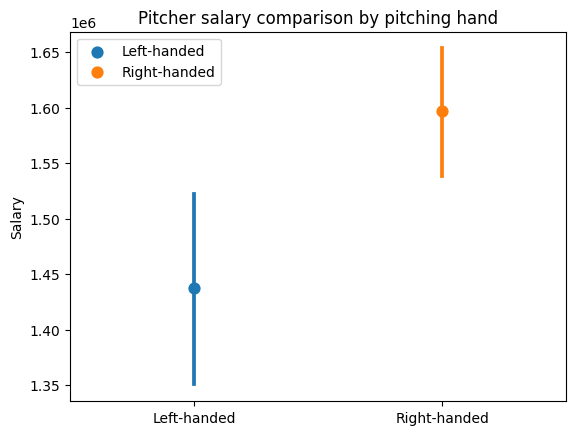

In [130]:
import seaborn as sns

# transform arrays into lists (otherwise it does not work)
left_handed_salaries = list(left_handed_salaries)
right_handed_salaries = list(right_handed_salaries)

# create the point plot
sns.pointplot(x=['Left-handed'] * len(left_handed_salaries) + ['Right-handed'] * len(right_handed_salaries),
              y=left_handed_salaries + right_handed_salaries,
              hue=['Left-handed'] * len(left_handed_salaries) + ['Right-handed'] * len(right_handed_salaries))

plt.ylabel('Salary')
plt.title('Pitcher salary comparison by pitching hand')

plt.show()

**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

By looking at the confidence intervals, we see that the CI for left-handed pitchers is lower than the one for right-handed pitchers, which means that at a 5% level of significance, the difference between the distributions is statistically significant.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

In [135]:
import scipy.stats as scs

# t-test
t_value, p_value = scs.ttest_ind(left_handed_salaries, right_handed_salaries)

print("t-value:", t_value.round(3))
print("P-value:", p_value.round(3))

if t_value < 0:
    print("t =", t_value.round(3), "so the sample mean of right-handed pitchers is greater.")
else:
    print("t =", t_value.round(3), "so the sample mean of left-handed pitchers is greater.")

# check if the difference is statistically significant
alpha = 0.05

if p_value < alpha:
    print("p < 0.05, so the difference in salaries is statistically significant.")
else:
    print("p > 0.05, so there is no significant difference in salaries.")

t-value: -3.011
P-value: 0.003
t = -3.011 so the sample mean of right-handed pitchers is greater.
p < 0.05, so the difference in salaries is statistically significant.


It is important to keep in mind that the t-test assumes that both salary data are normally distributed and with approximately equal variances (the values of the variances are close enough according to question 2.5).

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?